Using Regression Methods to Model Institutional Impact on Undergraduate Computer Science Gender Parity: Exploratory Data Analysis and Modeling 


Sophie Goldman

SML 312

December 2022

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.metrics import make_scorer
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt

### Import cleaned data, complete data preparation steps

In [2]:
path = '/content/drive/MyDrive/SML 312/Final Project Final Data/Cleaned_NCES_Data.csv'
df = pd.read_csv(path)

In [3]:
df = df.drop(columns=['Unnamed: 0', 'IDX_S', 'IDX_HR', 'Tribal college', "Faculty_Tenure_Status"], axis=1)

In [4]:
df = df.replace({'Historically Black College or University': {'Yes': 1, 'No': 0}})

In [5]:
print(df.isna().sum().sum())

0


In [6]:
df['Enrollment_Percent_Asian'] = df['Enrollment_Asian_total']/df['Enrollment_Grand_total']
df['Enrollment_Percent_Hispanic_or_Latino'] = df['Enrollment_Hispanic_or_Latino_total']/df['Enrollment_Grand_total']
df['Enrollment_Percent_Black_or_African_American'] = df['Enrollment_Black_or_African_American_total']/df['Enrollment_Grand_total']
df['Enrollment_Percent_White'] = df['Enrollment_White_total']/df['Enrollment_Grand_total']


In [7]:
df.columns

Index(['unitid', 'FIPS state code', 'Historically Black College or University',
       'Public, 4-year or above', 'institution_name', 'year', 'Grand_total',
       'Grand_total_men', 'Grand_total_women', 'Asian_total', 'Asian_men',
       'Asian_women', 'Black_or_African_American_total',
       'Black_or_African_American_men', 'Black_or_African_American_women',
       'Hispanic_or_Latino_total', 'Hispanic_or_Latino_men',
       'Hispanic_or_Latino_women', 'White_total', 'White_men', 'White_women',
       'GPI', 'CS_percent_women', 'Percent_admitted',
       'SAT_Math_25th_percentile_score', 'SAT_Math_75th_percentile_score',
       'Faculty_Grand_total', 'Faculty_Grand_total_men',
       'Faculty_Grand_total_women', 'Faculty_White_total', 'Faculty_White_men',
       'Faculty_White_women', 'Faculty_Black_or_African_American_total',
       'Faculty_Black_or_African_American_men',
       'Faculty_Black_or_African_American_women',
       'Faculty_Hispanic_or_Latino_total', 'Faculty_Hispanic

In [8]:
X = df[['unitid', 'FIPS state code', 'Historically Black College or University',
       'Public, 4-year or above', 'institution_name', 'year', 'Grand_total',
       'Grand_total_men', 'Grand_total_women', 'Asian_total', 'Asian_men',
       'Asian_women', 'Black_or_African_American_total',
       'Black_or_African_American_men', 'Black_or_African_American_women',
       'Hispanic_or_Latino_total', 'Hispanic_or_Latino_men',
       'Hispanic_or_Latino_women', 'White_total', 'White_men', 'White_women',
        'Percent_admitted', 'SAT_Math_25th_percentile_score', 'SAT_Math_75th_percentile_score','Faculty_Grand_total',
       'Faculty_Grand_total_men', 'Faculty_Grand_total_women',
       'Faculty_White_total', 'Faculty_White_men', 'Faculty_White_women',
       'Faculty_Black_or_African_American_total',
       'Faculty_Black_or_African_American_men',
       'Faculty_Black_or_African_American_women',
       'Faculty_Hispanic_or_Latino_total', 'Faculty_Hispanic_or_Latino_men',
       'Faculty_Hispanic_or_Latino_women', 'Faculty_Asian_total',
       'Faculty_Asian_men', 'Faculty_Asian_women', 'Faculty_GPI', 'Enrollment_Grand_total', 'Enrollment_Percent_Asian', 'Enrollment_Percent_Hispanic_or_Latino', 'Enrollment_Percent_Black_or_African_American', 'Enrollment_Percent_White','Far West (AK, CA, HI, NV, OR, WA)', 'Great Lakes (IL, IN, MI, OH, WI)',
       'Mid East (DE, DC, MD, NJ, NY, PA)',
       'New England (CT, ME, MA, NH, RI, VT)',
       'Plains (IA, KS, MN, MO, NE, ND, SD)',
       'Rocky Mountains (CO, ID, MT, UT, WY)',
       'Southeast (AL, AR, FL, GA, KY, LA, MS, NC, SC, TN, VA, WV)',
       'Southwest (AZ, NM, OK, TX)',
       'Baccalaureate Colleges: Arts & Sciences Focus',
       'Baccalaureate Colleges: Diverse Fields',
       'Doctoral Universities: High Research Activity',
       'Doctoral Universities: Very High Research Activity',
       'Doctoral/Professional Universities',
       'Master\'s Colleges & Universities: Larger Programs',
       'Master\'s Colleges & Universities: Medium Programs',
       'Master\'s Colleges & Universities: Small Programs',
       'Special Focus Four-Year: Business & Management Schools',
       'Special Focus Four-Year: Engineering and Other Technology-Related Schools']]
Y = df[['GPI', 'CS_percent_women']]

In [9]:
df

,unitid,FIPS state code,Historically Black College or University,"Public, 4-year or above",institution_name,year,Grand_total,Grand_total_men,Grand_total_women,Asian_total,...,Doctoral/Professional Universities,Master's Colleges & Universities: Larger Programs,Master's Colleges & Universities: Medium Programs,Master's Colleges & Universities: Small Programs,Special Focus Four-Year: Business & Management Schools,Special Focus Four-Year: Engineering and Other Technology-Related Schools,Enrollment_Percent_Asian,Enrollment_Percent_Hispanic_or_Latino,Enrollment_Percent_Black_or_African_American,Enrollment_Percent_White
0,100654,Alabama,1,1,Alabama A & M University,2009,29,17,12,0.0,...,0,1,0,0,0,0,0.002669,0.003336,0.953514,0.027802
1,100654,Alabama,1,1,Alabama A & M University,2011,16,8,8,0.0,...,0,1,0,0,0,0,0.001696,0.004118,0.956395,0.026405
2,100654,Alabama,1,1,Alabama A & M University,2013,21,11,10,0.0,...,0,1,0,0,0,0,0.002222,0.008887,0.950136,0.027894
3,100654,Alabama,1,1,Alabama A & M University,2015,27,15,12,0.0,...,0,1,0,0,0,0,0.001777,0.005774,0.921830,0.033755
4,100654,Alabama,1,1,Alabama A & M University,2016,17,8,9,0.0,...,0,1,0,0,0,0,0.002061,0.007215,0.913008,0.024737
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8313,490805,Indiana,0,1,Purdue University Northwest,2017,10,8,2,0.0,...,0,1,0,0,0,0,0.023352,0.175768,0.092689,0.624573
8314,490805,Indiana,0,1,Purdue University Northwest,2018,17,17,0,1.0,...,0,1,0,0,0,0,0.027578,0.195132,0.095686,0.606289
8315,490805,Indiana,0,1,Purdue University Northwest,2019,19,16,3,2.0,...,0,1,0,0,0,0,0.029761,0.204041,0.100922,0.590819
8316,490805,Indiana,0,1,Purdue University Northwest,2020,24,22,2,1.0,...,0,1,0,0,0,0,0.029395,0.226256,0.101066,0.583441


### Generate 60/20/20 train/validation/test split

In [10]:
X_train, X_test, y_train, y_test  = train_test_split(X, Y, test_size=0.2, random_state=1)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1)

In [11]:
train_data = X_train.copy()
train_data['GPI'] = y_train['GPI'].copy()
train_data['CS_percent_women'] = y_train['CS_percent_women'].copy()

val_data = X_val.copy()
val_data['GPI'] = y_val['GPI'].copy()
val_data['CS_percent_women'] = y_val['CS_percent_women'].copy()

test_data = X_test.copy()
test_data['GPI'] = y_test['GPI'].copy()
test_data['CS_percent_women'] = y_test['CS_percent_women'].copy()

### Exploratory Data Analysis

#### Distribution of Computer Science Gender Parity Index (GPI) Across Training Data

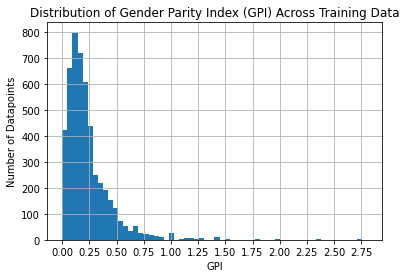

In [12]:
fig, ax = plt.subplots(nrows=1, ncols=1)
train_data[train_data['GPI'] < 3].hist('GPI', bins=60, ax=ax)
ax.set_xlabel("GPI")
ax.set_ylabel("Number of Datapoints")
ax.set_title("Distribution of Gender Parity Index (GPI) Across Training Data")
ax.set_xticks(np.arange(0, 3, 0.25))

In [13]:
train_data['GPI'].describe()

count    4990.000000
mean        0.240082
std         0.259584
min         0.000000
25%         0.100000
50%         0.178571
75%         0.294118
max         5.000000
Name: GPI, dtype: float64

In [14]:
train_data[train_data['GPI'] > 0.80]

,unitid,FIPS state code,Historically Black College or University,"Public, 4-year or above",institution_name,year,Grand_total,Grand_total_men,Grand_total_women,Asian_total,...,Doctoral Universities: High Research Activity,Doctoral Universities: Very High Research Activity,Doctoral/Professional Universities,Master's Colleges & Universities: Larger Programs,Master's Colleges & Universities: Medium Programs,Master's Colleges & Universities: Small Programs,Special Focus Four-Year: Business & Management Schools,Special Focus Four-Year: Engineering and Other Technology-Related Schools,GPI,CS_percent_women
5287,198756,North Carolina,1,0,Johnson C Smith University,2005,34,14,20,0.0,...,0,0,0,0,0,0,0,0,1.428571,0.588235
701,115409,California,0,0,Harvey Mudd College,2016,43,19,24,7.0,...,0,0,0,0,0,0,0,0,1.263158,0.558140
6574,217420,Rhode Island,0,1,Rhode Island College,2003,12,6,6,2.0,...,0,0,0,1,0,0,0,0,1.000000,0.500000
2824,163338,Maryland,1,1,University of Maryland Eastern Shore,2014,12,5,7,1.0,...,1,0,0,0,0,0,0,0,1.400000,0.583333
5215,198507,North Carolina,1,1,Elizabeth City State University,2004,27,12,15,0.0,...,0,0,0,0,0,0,0,0,1.250000,0.555556
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5220,198507,North Carolina,1,1,Elizabeth City State University,2010,15,8,7,0.0,...,0,0,0,0,0,0,0,0,0.875000,0.466667
3672,174914,Minnesota,0,0,University of St Thomas,2007,18,6,12,1.0,...,0,0,1,0,0,0,0,0,2.000000,0.666667
741,120883,California,0,0,University of the Pacific,2005,13,7,6,5.0,...,0,0,1,0,0,0,0,0,0.857143,0.461538
4861,195173,New York,0,0,St. Francis College,2004,25,13,12,0.0,...,0,0,0,0,0,0,0,0,0.923077,0.480000


#### Mean Computer Science GPI by Institution

In [15]:
train_data.groupby('institution_name').mean().describe()['GPI']

count    783.000000
mean       0.274131
std        0.287656
min        0.000000
25%        0.139324
50%        0.203633
75%        0.315548
max        5.000000
Name: GPI, dtype: float64

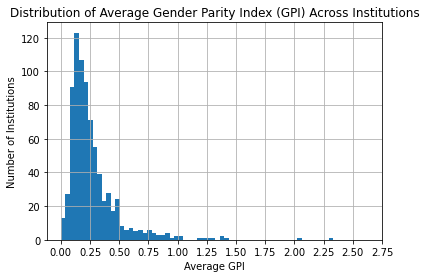

In [16]:
fig, ax = plt.subplots(nrows=1, ncols=1)
train_data[train_data['GPI'] < 3].groupby('institution_name').mean().hist('GPI', bins=60, ax=ax)
ax.set_xlabel("Average GPI")
ax.set_ylabel("Number of Institutions")
ax.set_title("Distribution of Average Gender Parity Index (GPI) Across Institutions")
ax.set_xticks(np.arange(0, 3, 0.25))

#### Percent of CS Degrees Awarded to Women

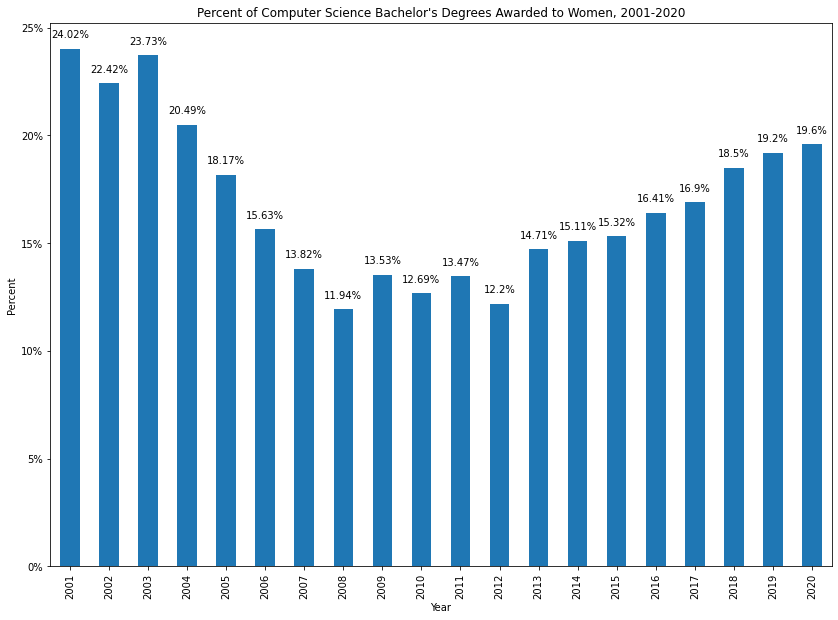

In [17]:
CS_percent_women_by_year = train_data.groupby('year').sum()['Grand_total_women']/train_data.groupby('year').sum()['Grand_total']
ax = CS_percent_women_by_year.plot(figsize=(14, 10), kind = 'bar')
ax.set_title("Percent of Computer Science Bachelor's Degrees Awarded to Women, 2001-2020")
ax.set_ylabel("Percent")
ax.set_xlabel("Year")
ax.set_yticks(np.arange(0, 0.3, 0.05))
ax.set_yticklabels([str(round(v)) + "%" for v in ax.get_yticks()*100])
for i in range(len(range(20))):
  ax.text(i, CS_percent_women_by_year.values[i] + 0.005, str(round(CS_percent_women_by_year.values[i]*100, 2)) + "%", ha = 'center')

Text(0, 0.5, 'Number of Students')

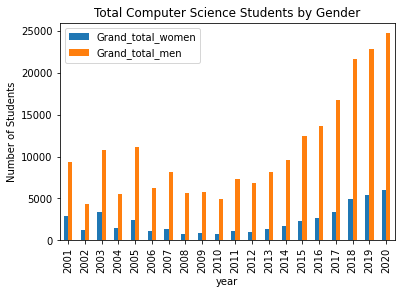

In [18]:
CS_student_by_gender_year = train_data.groupby('year')[['Grand_total_women', 'Grand_total_men']].sum().plot(kind='bar')
CS_student_by_gender_year.set_title("Total Computer Science Students by Gender")
CS_student_by_gender_year.set_ylabel("Number of Students")

#### GPI by Year

In [19]:
train_data.groupby(by='year')['GPI'].describe()

,count,mean,std,min,25%,50%,75%,max
year,,,,,,,,
2001,252.0,0.400222,0.531707,0.0,0.163958,0.274295,0.421474,5.000000
2002,114.0,0.353868,0.351790,0.0,0.166667,0.284648,0.434416,2.750000
2003,279.0,0.346413,0.337211,0.0,0.166667,0.264368,0.436179,4.000000
2004,155.0,0.328722,0.311699,0.0,0.140828,0.235955,0.417138,2.333333
2005,307.0,0.270683,0.257199,0.0,0.103173,0.192308,0.353890,1.777778
2006,186.0,0.267769,0.349022,0.0,0.100000,0.171573,0.294118,2.750000
2007,254.0,0.202414,0.237394,0.0,0.076923,0.135749,0.250000,2.000000
2008,171.0,0.159388,0.158363,0.0,0.064583,0.115385,0.200000,1.200000
2009,210.0,0.179871,0.195409,0.0,0.066667,0.129734,0.230306,1.142857


#### Compare Data by Institution Types

In [20]:
year_GPI_mean = train_data.groupby('year')['GPI'].mean()

In [21]:
public_or_private_mean = train_data.groupby('Public, 4-year or above')['GPI'].mean()

In [22]:
hbcu_mean = train_data.groupby('Historically Black College or University')['GPI'].mean()

[Text(0, 0, '0'), Text(0, 0, '1')]

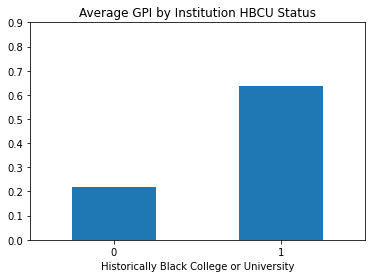

In [23]:
ax = hbcu_mean.plot(kind='bar', title='Average GPI by Institution HBCU Status')
ax.set_yticks(np.arange(0, 1, 0.1))
ax.set_xticklabels(ax.get_xticks(), rotation = 0)

In [24]:
HBCU_public_private_mean = train_data.groupby(['Historically Black College or University', 'Public, 4-year or above'])['GPI'].mean()

In [25]:
HBCU_public_private_mean.index = ['Non-HBCU, Private', 'Non-HBCU, Public', 'HBCU, Private', 'HBCU, Public']

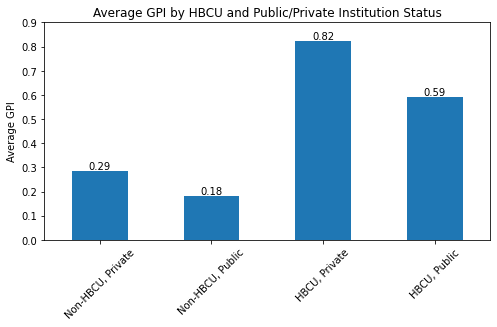

In [26]:
fig, ax = plt.subplots(nrows=1, ncols=1, sharex=True, sharey=True)
HBCU_public_private_mean.plot(kind='bar', title='Average GPI by HBCU and Public/Private Institution Status', ax=ax, figsize=(8, 4))
ax.set_yticks(np.arange(0, 1, 0.1))
ax.set_xticklabels(labels=HBCU_public_private_mean.index, rotation=45)
ax.set_ylabel("Average GPI")
for i in range(len(range(4))):
  ax.text(i, HBCU_public_private_mean.values[i] + 0.005, str(round(HBCU_public_private_mean.values[i], 2)), ha = 'center')


In [27]:
southeast_mean = train_data.groupby('Southeast (AL, AR, FL, GA, KY, LA, MS, NC, SC, TN, VA, WV)')['GPI'].mean()

Text(0, 0.5, 'Average GPI')

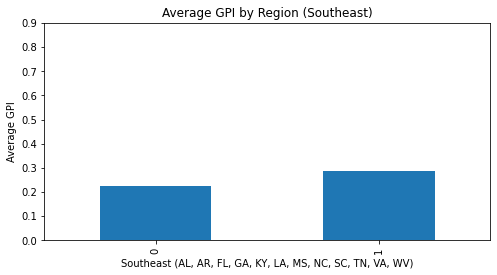

In [28]:
fig, ax = plt.subplots(nrows=1, ncols=1, sharex=True, sharey=True)
southeast_mean.plot(kind='bar', title='Average GPI by Region (Southeast)', ax=ax, figsize=(8, 4))
ax.set_yticks(np.arange(0, 1, 0.1))
ax.set_ylabel("Average GPI")


#### Examine Faculty GPI vs. Computer Science GPI

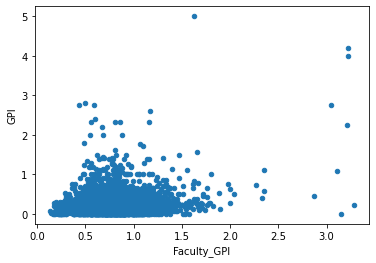

In [29]:
train_data.plot('Faculty_GPI', 'GPI', kind='scatter')

In [30]:
# Calculate how many times each institution appears in the dataset
# Label all institutions that contain "tech" in the institution name (not used in analysis)
count = []
engineering_science = []
counts  =train_data.groupby('institution_name')['CS_percent_women'].describe()['count']
for inst in train_data['institution_name']:
  count.append(counts[inst])
  engineering_science.append("tech" in inst.lower())


In [31]:
train_data['Count'] = count

In [32]:
institution_counts = train_data[train_data['Count'] > 3]

#### Examine Institutions with the Highest/Lowest Average GPI

Consider only institutions with at least 4 years of data

Text(0.5, 1.0, '30 Institutions with the Highest Average GPI')

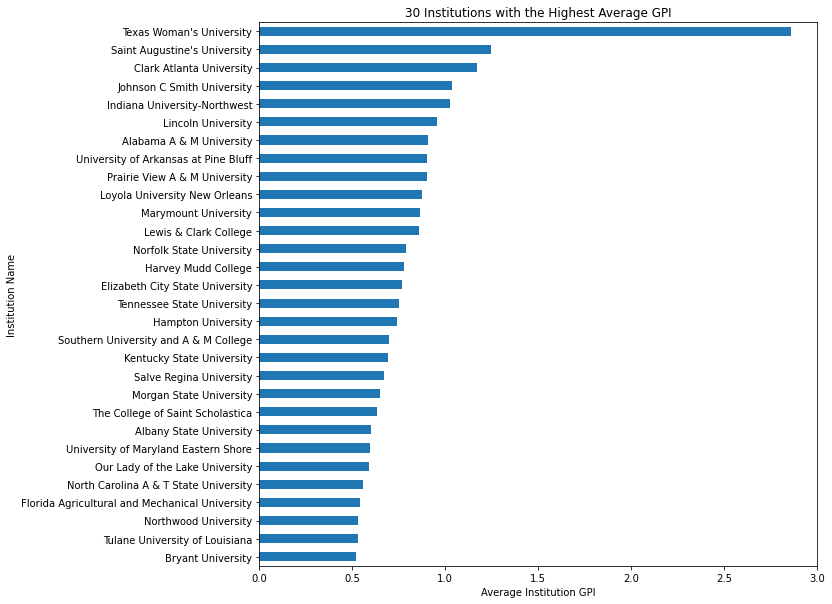

In [33]:
ax = institution_counts.groupby('institution_name')['GPI'].mean().sort_values().tail(30).plot(kind="barh", figsize=(10, 10))
ax.set_ylabel("Institution Name")
ax.set_xlabel("Average Institution GPI")
ax.set_title("30 Institutions with the Highest Average GPI")

Text(0.5, 1.0, '30 Institutions with the Lowest Average GPI')

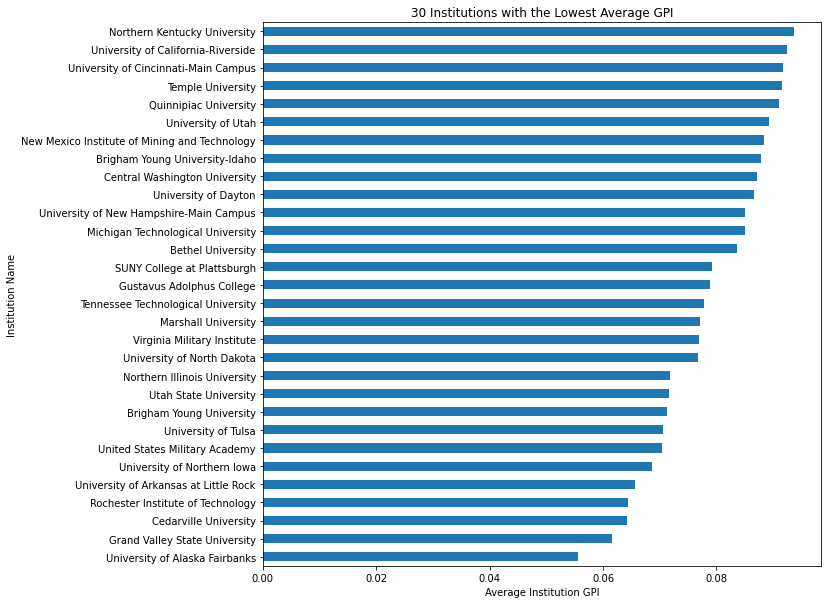

In [34]:
ax = institution_counts.groupby('institution_name')['GPI'].mean().sort_values().head(30).plot(kind="barh", figsize=(10, 10))
ax.set_ylabel("Institution Name")
ax.set_xlabel("Average Institution GPI")
ax.set_title("30 Institutions with the Lowest Average GPI")

In [35]:
train_data['Engineering or Science'] = engineering_science

#### Determine Correlations

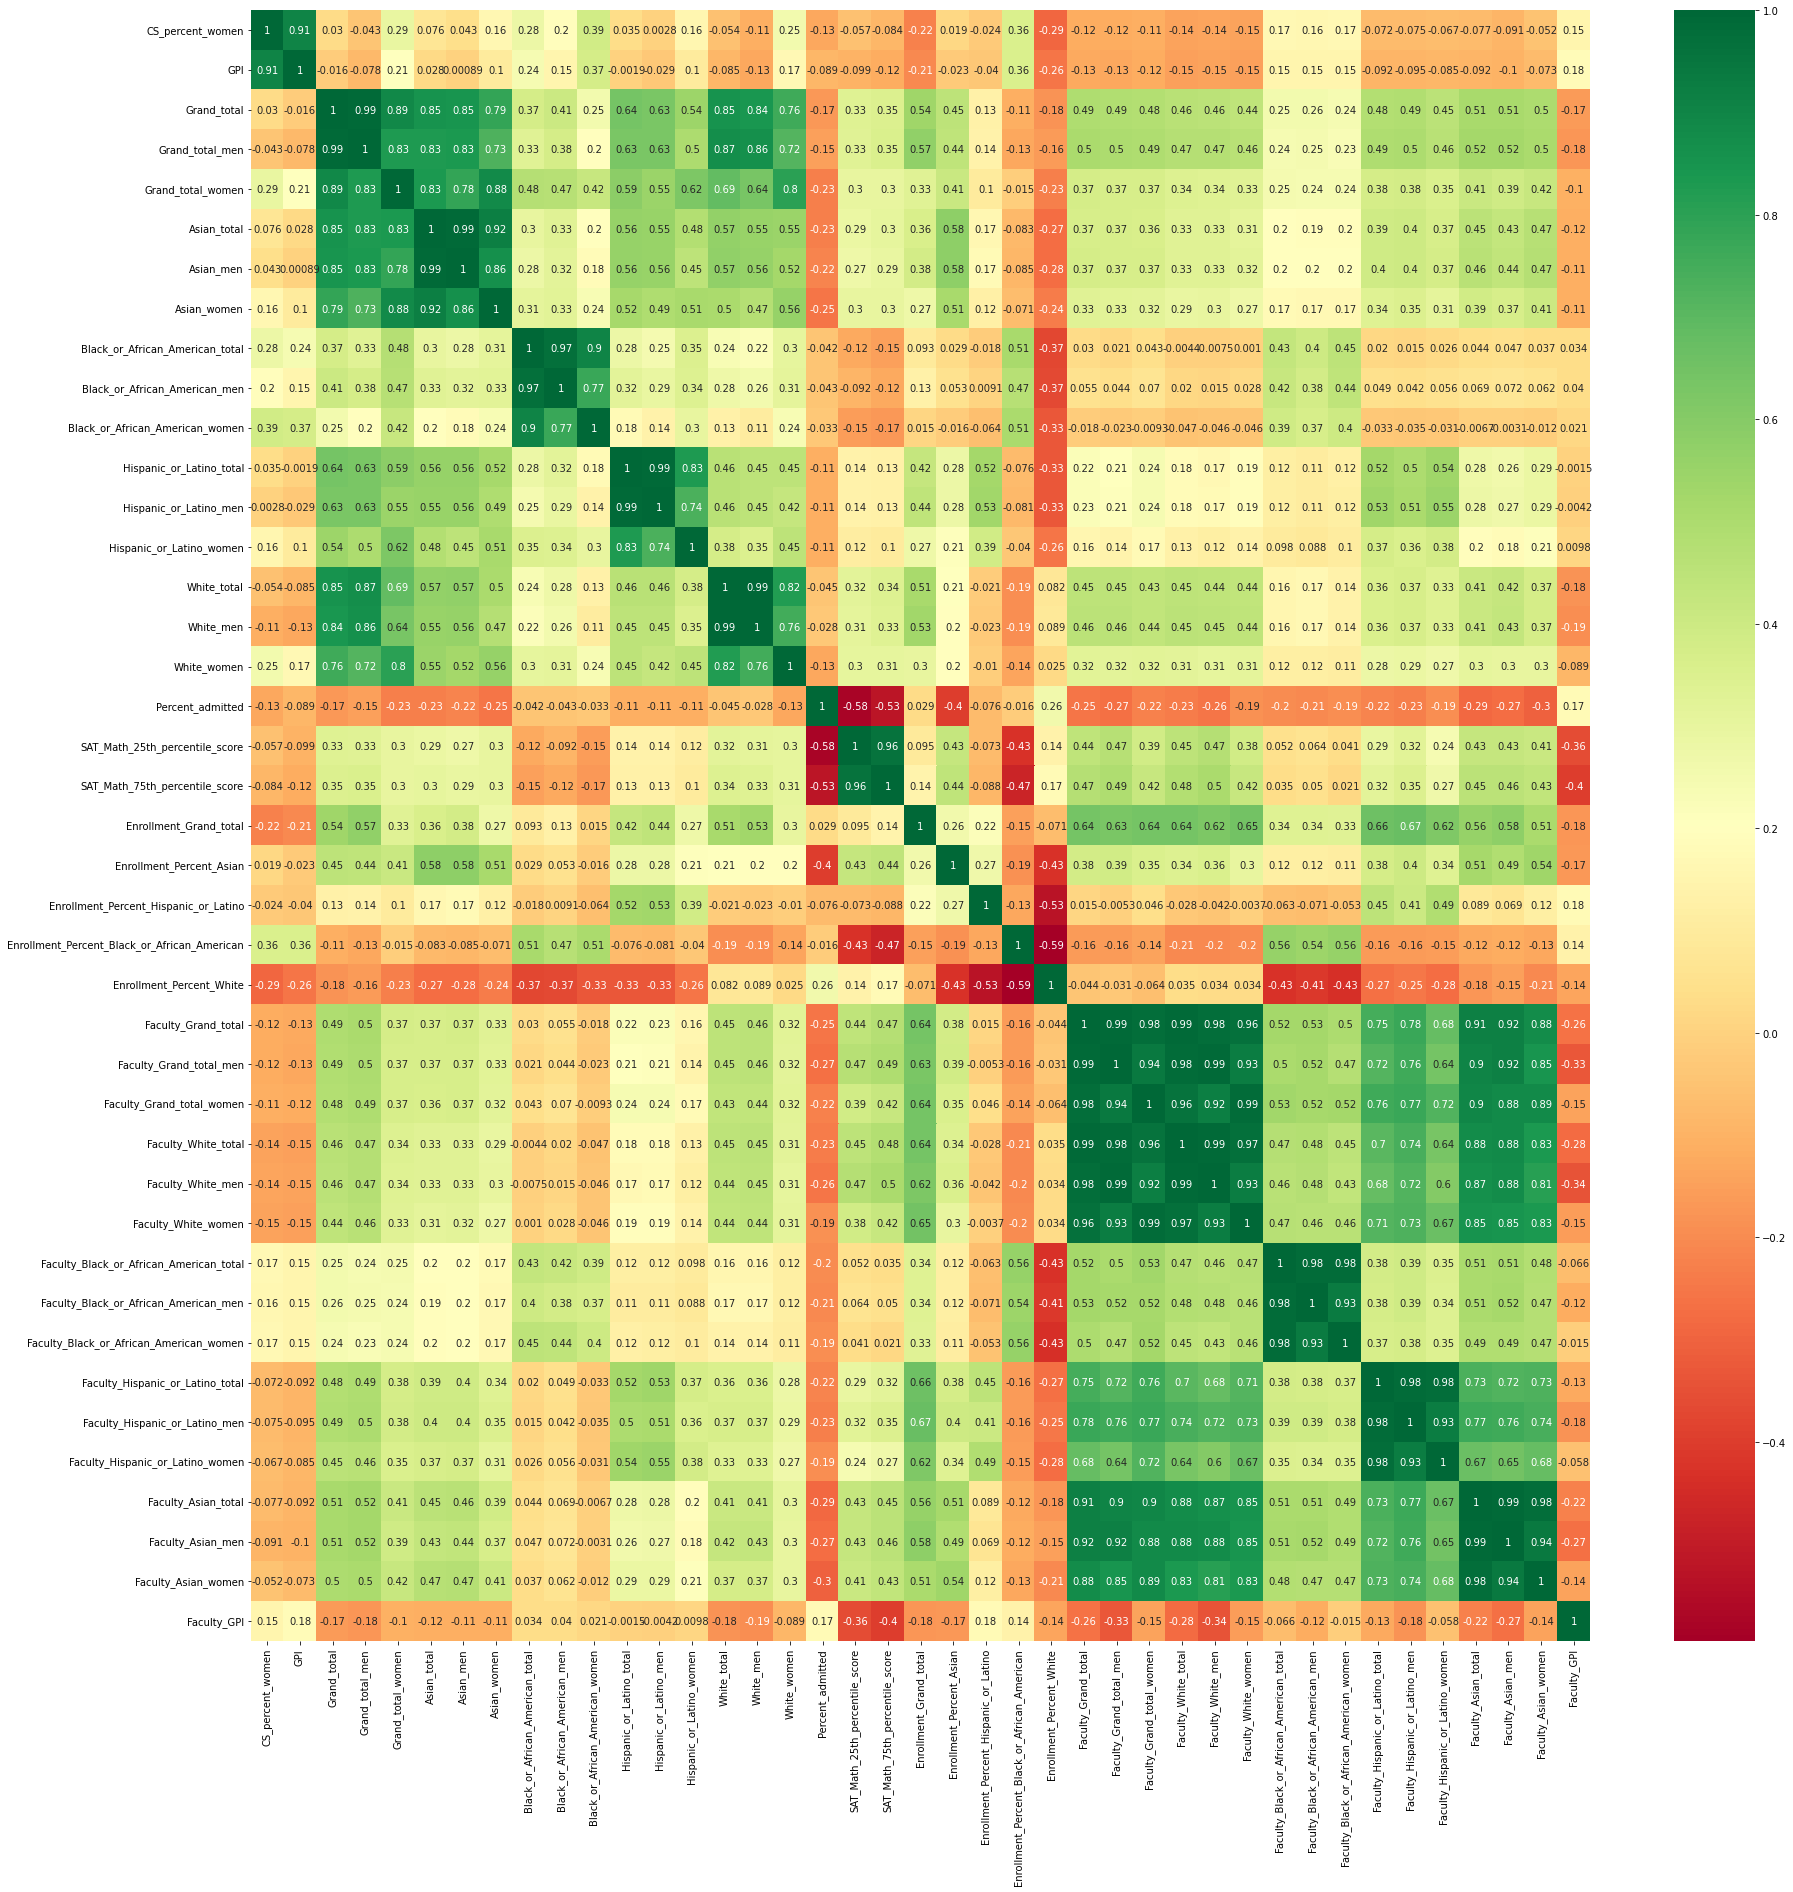

In [36]:

import seaborn as sns
import matplotlib.pyplot as plt

corr_columns = ['CS_percent_women',
       'GPI','Grand_total',
       'Grand_total_men', 'Grand_total_women', 'Asian_total', 'Asian_men',
       'Asian_women', 'Black_or_African_American_total',
       'Black_or_African_American_men', 'Black_or_African_American_women',
       'Hispanic_or_Latino_total', 'Hispanic_or_Latino_men',
       'Hispanic_or_Latino_women', 'White_total', 'White_men', 'White_women',  'Percent_admitted',
       'SAT_Math_25th_percentile_score', 'SAT_Math_75th_percentile_score', 'Enrollment_Grand_total', 'Enrollment_Percent_Asian', 'Enrollment_Percent_Hispanic_or_Latino', 'Enrollment_Percent_Black_or_African_American', 'Enrollment_Percent_White',
       'Faculty_Grand_total',
       'Faculty_Grand_total_men', 'Faculty_Grand_total_women',
       'Faculty_White_total', 'Faculty_White_men', 'Faculty_White_women',
       'Faculty_Black_or_African_American_total',
       'Faculty_Black_or_African_American_men',
       'Faculty_Black_or_African_American_women',
       'Faculty_Hispanic_or_Latino_total', 'Faculty_Hispanic_or_Latino_men',
       'Faculty_Hispanic_or_Latino_women', 'Faculty_Asian_total',
       'Faculty_Asian_men', 'Faculty_Asian_women', 'Faculty_GPI'] 
corr = train_data[corr_columns].corr()
plt.subplots(figsize=(30,30))
sns.heatmap(corr,cmap= 'RdYlGn',annot=True)
plt.show()

In [37]:
import scipy.stats as stats
binary_columns = ['Historically Black College or University',
        'Public, 4-year or above',  'Far West (AK, CA, HI, NV, OR, WA)', 'Great Lakes (IL, IN, MI, OH, WI)',
       'Mid East (DE, DC, MD, NJ, NY, PA)',
       'New England (CT, ME, MA, NH, RI, VT)',
       'Plains (IA, KS, MN, MO, NE, ND, SD)',
       'Rocky Mountains (CO, ID, MT, UT, WY)',
       'Southeast (AL, AR, FL, GA, KY, LA, MS, NC, SC, TN, VA, WV)',
       'Southwest (AZ, NM, OK, TX)',
       'Baccalaureate Colleges: Arts & Sciences Focus',
       'Baccalaureate Colleges: Diverse Fields',
       'Doctoral Universities: High Research Activity',
       'Doctoral Universities: Very High Research Activity',
       'Doctoral/Professional Universities',
       'Master\'s Colleges & Universities: Larger Programs',
       'Master\'s Colleges & Universities: Medium Programs',
       'Master\'s Colleges & Universities: Small Programs',
       'Special Focus Four-Year: Business & Management Schools',
       'Special Focus Four-Year: Engineering and Other Technology-Related Schools']

corr_with_target = pd.DataFrame(binary_columns, columns=['Feature Name'])
corr_values = []
p_values = []
#calculate point-biserial correlation for each feature
for col in binary_columns:
  corr, p_val = stats.pointbiserialr(X_train[col].values, y_train['GPI'])
  corr_values.append(corr)
  p_values.append(p_val)
corr_with_target['correlation'] = corr_values
corr_with_target['p_val'] = p_values
corr_with_target = corr_with_target.sort_values(by='correlation')


In [38]:
corr_with_target.columns = ['Feature Name', 'Correlation', 'p-value']

In [39]:
corr_with_target[['Feature Name', 'Correlation']].to_latex(index=False)

"\\begin{tabular}{lr}\n\\toprule\n                                      Feature Name &  Correlation \\\\\n\\midrule\n                           Public, 4-year or above &    -0.172264 \\\\\nDoctoral Universities: Very High Research Activity &    -0.113386 \\\\\n              Rocky Mountains (CO, ID, MT, UT, WY) &    -0.056900 \\\\\n                  Great Lakes (IL, IN, MI, OH, WI) &    -0.052124 \\\\\n     Doctoral Universities: High Research Activity &    -0.050531 \\\\\n               Plains (IA, KS, MN, MO, NE, ND, SD) &    -0.041548 \\\\\n Master's Colleges \\& Universities: Larger Programs &    -0.040016 \\\\\n                 Far West (AK, CA, HI, NV, OR, WA) &    -0.035390 \\\\\nSpecial Focus Four-Year: Engineering and Other ... &    -0.023174 \\\\\n              New England (CT, ME, MA, NH, RI, VT) &     0.005294 \\\\\n                        Southwest (AZ, NM, OK, TX) &     0.007145 \\\\\n                 Mid East (DE, DC, MD, NJ, NY, PA) &     0.013729 \\\\\n  Master's Colleg

Historically Black College or University


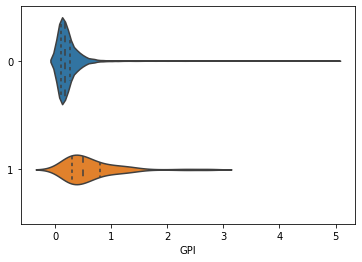

Public, 4-year or above


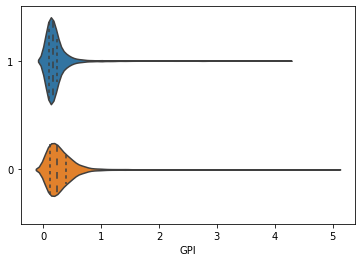

Far West (AK, CA, HI, NV, OR, WA)


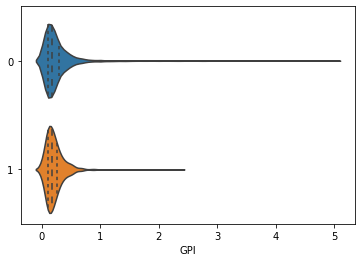

Great Lakes (IL, IN, MI, OH, WI)


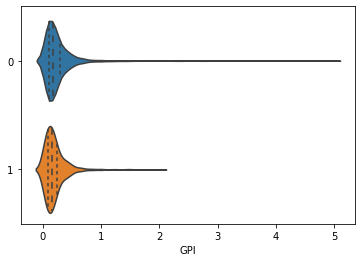

Mid East (DE, DC, MD, NJ, NY, PA)


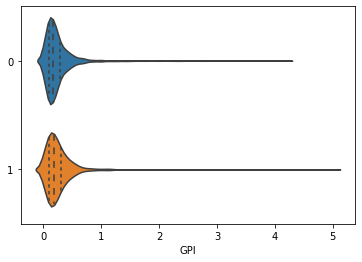

New England (CT, ME, MA, NH, RI, VT)


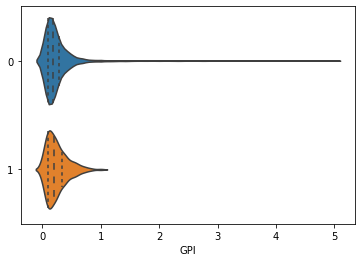

Plains (IA, KS, MN, MO, NE, ND, SD)


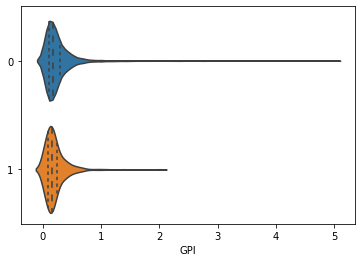

Rocky Mountains (CO, ID, MT, UT, WY)


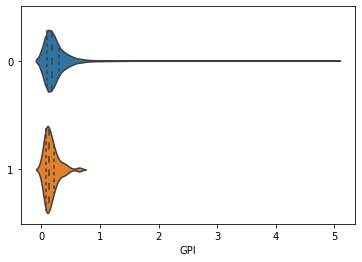

Southeast (AL, AR, FL, GA, KY, LA, MS, NC, SC, TN, VA, WV)


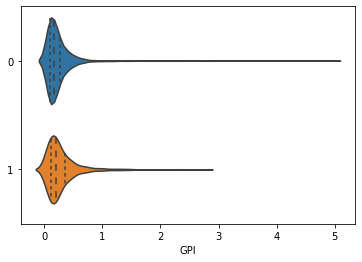

Southwest (AZ, NM, OK, TX)


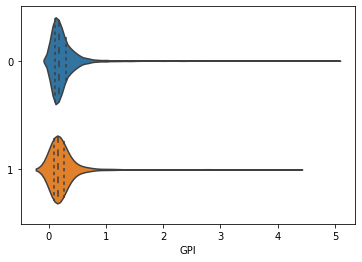

Baccalaureate Colleges: Arts & Sciences Focus


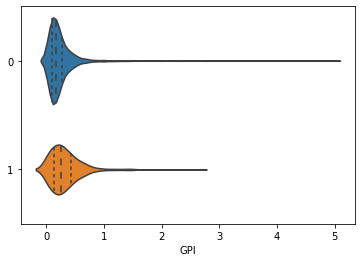

Baccalaureate Colleges: Diverse Fields


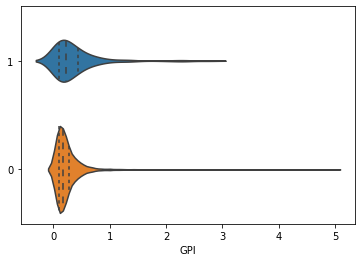

Doctoral Universities: High Research Activity


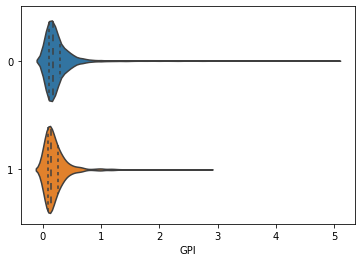

Doctoral Universities: Very High Research Activity


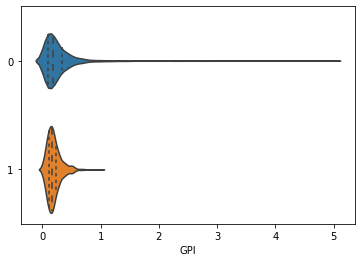

Doctoral/Professional Universities


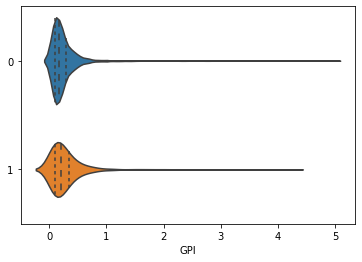

Master's Colleges & Universities: Larger Programs


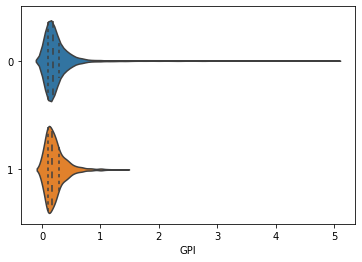

Master's Colleges & Universities: Medium Programs


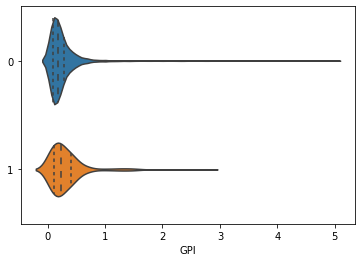

Master's Colleges & Universities: Small Programs


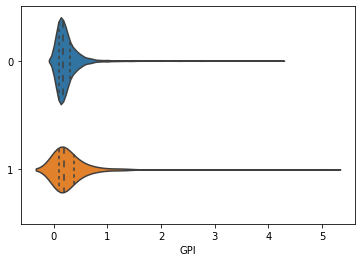

Special Focus Four-Year: Business & Management Schools


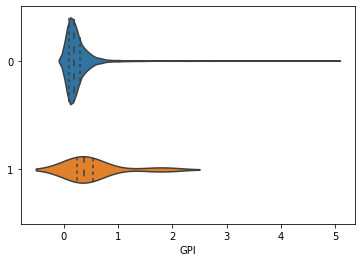

Special Focus Four-Year: Engineering and Other Technology-Related Schools


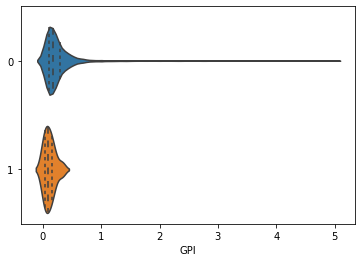

In [40]:
for col in binary_columns:
  print(col)
  col_data = train_data[col].copy()
  col_data = [str(r) for r in col_data]
  sns.violinplot(data=train_data, y=col_data, x='GPI', inner='quartile')
  plt.show()

#### Examine Relationship between GPI and Black/African American Enrollment Percentage

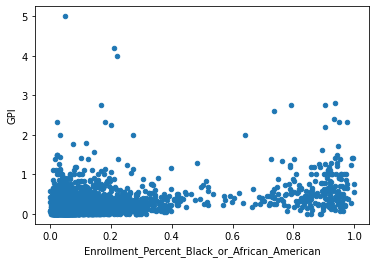

In [41]:
train_data.plot('Enrollment_Percent_Black_or_African_American', 'GPI', kind='scatter')

In [42]:
tech_train = []
tech_val = []
tech_test = []
for inst in train_data['institution_name']:
  tech_train.append("tech" in inst.lower())
for inst in val_data['institution_name']:
  tech_val.append("tech" in inst.lower())
for inst in test_data['institution_name']:
  tech_test.append("tech" in inst.lower())

X_train["Tech"] = tech_train
X_val["Tech"] = tech_val
X_test["Tech"] = tech_test

### Feature Selection

In [43]:
feature_selection = ['Public, 4-year or above', 'Enrollment_Grand_total', 'Faculty_GPI', 'Enrollment_Percent_Black_or_African_American' ]

In [44]:
features_all = ['Grand_total', 'Percent_admitted', 'SAT_Math_25th_percentile_score', 'SAT_Math_75th_percentile_score','Faculty_Grand_total',
       'Faculty_Grand_total_men', 'Faculty_Grand_total_women',
       'Faculty_White_total', 'Faculty_White_men', 'Faculty_White_women',
       'Faculty_Black_or_African_American_total',
       'Faculty_Black_or_African_American_men',
       'Faculty_Black_or_African_American_women',
       'Faculty_Hispanic_or_Latino_total', 'Faculty_Hispanic_or_Latino_men',
       'Faculty_Hispanic_or_Latino_women', 'Faculty_Asian_total',
       'Faculty_Asian_men', 'Faculty_Asian_women', 'Faculty_GPI', 'Enrollment_Grand_total', 'Enrollment_Percent_Asian', 'Enrollment_Percent_Hispanic_or_Latino', 'Enrollment_Percent_Black_or_African_American', 'Enrollment_Percent_White', 'Historically Black College or University',
        'Public, 4-year or above',  'Far West (AK, CA, HI, NV, OR, WA)', 'Great Lakes (IL, IN, MI, OH, WI)',
       'Mid East (DE, DC, MD, NJ, NY, PA)',
       'New England (CT, ME, MA, NH, RI, VT)',
       'Plains (IA, KS, MN, MO, NE, ND, SD)',
       'Rocky Mountains (CO, ID, MT, UT, WY)',
       'Southeast (AL, AR, FL, GA, KY, LA, MS, NC, SC, TN, VA, WV)',
       'Southwest (AZ, NM, OK, TX)',
       'Baccalaureate Colleges: Arts & Sciences Focus',
       'Baccalaureate Colleges: Diverse Fields',
       'Doctoral Universities: High Research Activity',
       'Doctoral Universities: Very High Research Activity',
       'Doctoral/Professional Universities',
       'Master\'s Colleges & Universities: Larger Programs',
       'Master\'s Colleges & Universities: Medium Programs',
       'Master\'s Colleges & Universities: Small Programs',
       'Special Focus Four-Year: Business & Management Schools',
       'Special Focus Four-Year: Engineering and Other Technology-Related Schools']
X_train_features_selected = X_train[feature_selection]

X_val_features_selected = X_val[feature_selection]

X_test_features_selected = X_test[feature_selection]

X_train = X_train[features_all]
X_val = X_val[features_all]
X_test = X_test[features_all]

In [45]:
y_train = y_train['GPI']
y_val = y_val['GPI']
y_test = y_test['GPI']

#### Calculate Variance Inflation Factor to Determine Multicollinearity Among Selected Features

In [46]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data = pd.DataFrame()
vif_data["Feature Name"] = X_train_features_selected.columns
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X_train_features_selected.values, i) for i in range(len(X_train_features_selected.columns))]

print(vif_data)

                                   Feature Name       VIF
0                       Public, 4-year or above  3.667223
1                        Enrollment_Grand_total  2.770419
2                                   Faculty_GPI  2.827547
3  Enrollment_Percent_Black_or_African_American  1.529560


In [47]:
vif_data.to_latex(index=False)

'\\begin{tabular}{lr}\n\\toprule\n                                Feature Name &      VIF \\\\\n\\midrule\n                     Public, 4-year or above & 3.667223 \\\\\n                      Enrollment\\_Grand\\_total & 2.770419 \\\\\n                                 Faculty\\_GPI & 2.827547 \\\\\nEnrollment\\_Percent\\_Black\\_or\\_African\\_American & 1.529560 \\\\\n\\bottomrule\n\\end{tabular}\n'

### Modeling

In [48]:
from sklearn.preprocessing import StandardScaler

In [49]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
scorer = make_scorer(mean_squared_error)

In [50]:
model_eval = pd.DataFrame()
model_names = []
train_mse = []
val_mse = []
val_r2 = []
cross_val_mse = []
test_mse = []
test_r2 = []

#### Linear Regression

##### Selected Features

In [51]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
lr = LinearRegression()
lr_pipeline = Pipeline([("scaler", StandardScaler()), ("Linear reg", lr)])
lr_pipeline.fit(X_train_features_selected, y_train)
lr_cv = cross_val_score(lr_pipeline, X_train_features_selected, y_train, scoring=scorer)


print("Train MSE:", mean_squared_error(y_train, lr_pipeline.predict(X_train_features_selected)))
print("Validation MSE:", mean_squared_error(y_val, lr_pipeline.predict(X_val_features_selected)))

model_names.append("Linear regression with four selected features")
train_mse.append(mean_squared_error(y_train, lr_pipeline.predict(X_train_features_selected)))
val_mse.append(mean_squared_error(y_val, lr_pipeline.predict(X_val_features_selected)))
val_r2.append(r2_score(y_val, lr_pipeline.predict(X_val_features_selected)))
cross_val_mse.append(np.mean(lr_cv))
test_mse.append(mean_squared_error(y_test, lr_pipeline.predict(X_test_features_selected)))
test_r2.append(r2_score(y_test, lr_pipeline.predict(X_test_features_selected)))


Train MSE: 0.054317240976949094
Validation MSE: 0.044095565704486105


In [52]:
for i, j in zip(lr_pipeline.feature_names_in_, lr_pipeline[1].coef_):
  print(i, j)

Public, 4-year or above -0.05147590881904681
Enrollment_Grand_total -0.010535458738862805
Faculty_GPI 0.03423136962647109
Enrollment_Percent_Black_or_African_American 0.09235044949272914


##### Single Variable: Faculty GPI

In [53]:
from sklearn.linear_model import LinearRegression

lr_facultyGPI = LinearRegression()

lr_facultyGPI.fit(np.array(X_train['Faculty_GPI']).reshape(-1,1), y_train)
lr_facultyGPI_cv = cross_val_score(lr_facultyGPI, np.array(X_train['Faculty_GPI']).reshape(-1,1), y_train, scoring=scorer)


print("Train MSE:", mean_squared_error(y_train, lr_facultyGPI.predict(np.array(X_train['Faculty_GPI']).reshape(-1,1))))
print("Validation MSE:", mean_squared_error(y_val, lr_facultyGPI.predict(np.array(X_val['Faculty_GPI']).reshape(-1,1))))

model_names.append("Linear regression with Faculty GPI")
train_mse.append(mean_squared_error(y_train, lr_facultyGPI.predict(np.array(X_train['Faculty_GPI']).reshape(-1,1))))
val_mse.append(mean_squared_error(y_val, lr_facultyGPI.predict(np.array(X_val['Faculty_GPI']).reshape(-1,1))))
val_r2.append(r2_score(y_val, lr_facultyGPI.predict(np.array(X_val['Faculty_GPI']).reshape(-1,1))))
cross_val_mse.append(np.mean(lr_facultyGPI_cv))
test_mse.append(mean_squared_error(y_test, lr_facultyGPI.predict(np.array(X_test['Faculty_GPI']).reshape(-1,1))))
test_r2.append(r2_score(y_test, lr_facultyGPI.predict(np.array(X_test['Faculty_GPI']).reshape(-1,1))))

Train MSE: 0.06511769758597288
Validation MSE: 0.05644657088831108


##### All Features

In [54]:
from sklearn.linear_model import LinearRegression


lr_feature_selection = LinearRegression()
lr_feature_selection_pipeline = Pipeline([("scaler", StandardScaler()), ("Linear reg", lr_feature_selection)])

lr_feature_selection_pipeline.fit(X_train, y_train)
lr_feature_selection_cv = cross_val_score(lr_feature_selection_pipeline, X_train, y_train, scoring=scorer)


print("Train MSE:", mean_squared_error(y_train, lr_feature_selection_pipeline.predict(X_train)))
print("Validation MSE:", mean_squared_error(y_val, lr_feature_selection_pipeline.predict(X_val)))

model_names.append("Linear regression with all features")
train_mse.append(mean_squared_error(y_train, lr_feature_selection_pipeline.predict(X_train)))
val_mse.append(mean_squared_error(y_val, lr_feature_selection_pipeline.predict(X_val)))
val_r2.append(r2_score(y_val, lr_feature_selection_pipeline.predict(X_val)))
cross_val_mse.append(np.mean(lr_feature_selection_cv))
test_mse.append(mean_squared_error(y_test, lr_feature_selection_pipeline.predict(X_test)))
test_r2.append(r2_score(y_test, lr_feature_selection_pipeline.predict(X_test)))

Train MSE: 0.05162554079544664
Validation MSE: 0.04198829438396372


In [55]:
for i, j in zip(lr_feature_selection_pipeline.feature_names_in_, lr_feature_selection_pipeline[1].coef_):
  print(i,j)

Grand_total 0.036274678093198794
Percent_admitted -0.013532578791797454
SAT_Math_25th_percentile_score -0.05188943217782294
SAT_Math_75th_percentile_score 0.03850769760194161
Faculty_Grand_total -0.022712412539434693
Faculty_Grand_total_men -0.018632928101091014
Faculty_Grand_total_women -0.028455051767681715
Faculty_White_total 0.021065240227844655
Faculty_White_men 0.027806342193501605
Faculty_White_women 0.008964916735198558
Faculty_Black_or_African_American_total 0.0005851192815386995
Faculty_Black_or_African_American_men 0.046103309379001076
Faculty_Black_or_African_American_women -0.04066250291463175
Faculty_Hispanic_or_Latino_total 0.009461147964111068
Faculty_Hispanic_or_Latino_men 0.030675636592552975
Faculty_Hispanic_or_Latino_women -0.01525947534596553
Faculty_Asian_total -0.005568561037059386
Faculty_Asian_men -0.011157527958536128
Faculty_Asian_women 0.003756459576719844
Faculty_GPI 0.05311245590135114
Enrollment_Grand_total -0.03994078341659271
Enrollment_Percent_Asian 0.

#### Elastic Net

In [56]:
from sklearn.linear_model import ElasticNet

##### L1 Ratio of 0.8

In [57]:
net = ElasticNet(l1_ratio=0.8)
net_pipeline = Pipeline([("scaler", StandardScaler()), ("net", net)])
net_pipeline.fit(X_train, y_train)
net_cv = cross_val_score(net_pipeline, X_train, y_train, scoring=scorer)

print("Train MSE:", mean_squared_error(y_train, net_pipeline.predict(X_train)))
print("Validation MSE:", mean_squared_error(y_val, net_pipeline.predict(X_val)))

model_names.append("Elastic Net with L1 ratio of 0.8")
train_mse.append(mean_squared_error(y_train, net_pipeline.predict(X_train)))
val_mse.append(mean_squared_error(y_val, net_pipeline.predict(X_val)))
val_r2.append(r2_score(y_val, net_pipeline.predict(X_val)))
cross_val_mse.append(np.mean(net_cv))
test_mse.append(mean_squared_error(y_test, net_pipeline.predict(X_test)))
test_r2.append(r2_score(y_test, net_pipeline.predict(X_test)))

Train MSE: 0.06737027336712728
Validation MSE: 0.05775147768167118


In [58]:
for i, j in zip(net_pipeline.feature_names_in_, net_pipeline[1].coef_):
  if j > 0:
    print(i,j)

##### L1 Ratio of 0.8, Alpha of 0.5

In [59]:
net_alpha = ElasticNet(l1_ratio=0.8, alpha=0.5)
net_alpha_pipeline = Pipeline([("scaler", StandardScaler()), ("net", net_alpha)])
net_alpha_pipeline.fit(X_train, y_train)

net_alpha_cv = cross_val_score(net_alpha_pipeline, X_train, y_train, scoring=scorer)

print("Train MSE:", mean_squared_error(y_train, net_alpha_pipeline.predict(X_train)))
print("Validation MSE:", mean_squared_error(y_val, net_alpha_pipeline.predict(X_val)))

model_names.append("Elastic Net with L1 ratio = 0.8, alpha = 0.5")
train_mse.append(mean_squared_error(y_train, net_alpha_pipeline.predict(X_train)))
val_mse.append(mean_squared_error(y_val, net_alpha_pipeline.predict(X_val)))
val_r2.append(r2_score(y_val, net_alpha_pipeline.predict(X_val)))
cross_val_mse.append(np.mean(net_alpha_cv))
test_mse.append(mean_squared_error(y_test, net_alpha_pipeline.predict(X_test)))
test_r2.append(r2_score(y_test, net_alpha_pipeline.predict(X_test)))

Train MSE: 0.06737027336712728
Validation MSE: 0.05775147768167118


In [60]:
for i, j in zip(net_alpha_pipeline.feature_names_in_, net_alpha_pipeline[1].coef_):
  if j > 0:
    print(i,j)

##### L1 Ratio of 0.5, Alpha of 0.1

In [61]:
net_alpha = ElasticNet(l1_ratio=0.5, alpha=0.1)
net_alpha_pipeline = Pipeline([("scaler", StandardScaler()), ("net", net_alpha)])
net_alpha_pipeline.fit(X_train, y_train)
net_alpha_cv = cross_val_score(net_alpha, X_train, y_train, scoring=scorer)

print("Train MSE:", mean_squared_error(y_train, net_alpha_pipeline.predict(X_train)))
print("Validation MSE:", mean_squared_error(y_val, net_alpha_pipeline.predict(X_val)))

model_names.append("Elastic Net with L1 ratio = 0.5, alpha = 0.1")
train_mse.append(mean_squared_error(y_train, net_alpha_pipeline.predict(X_train)))
val_mse.append(mean_squared_error(y_val, net_alpha_pipeline.predict(X_val)))
val_r2.append(r2_score(y_val, net_alpha_pipeline.predict(X_val)))
cross_val_mse.append(np.mean(net_alpha_cv))
test_mse.append(mean_squared_error(y_test, net_alpha_pipeline.predict(X_test)))
test_r2.append(r2_score(y_test, net_alpha_pipeline.predict(X_test)))

Train MSE: 0.061401034749033516
Validation MSE: 0.05157142530977936


In [62]:
for i, j in zip(net_alpha_pipeline.feature_names_in_, net_alpha_pipeline[1].coef_):
  if j > 0:
    print(i,j)

Enrollment_Percent_Black_or_African_American 0.035088129028207765
Historically Black College or University 0.006486336236602074


##### L1 Ratio of 0.1, Alpha of 0.2

In [63]:

net_alpha = ElasticNet(l1_ratio=0.1, alpha=0.2, max_iter=1500)
net_alpha_pipeline = Pipeline([("scaler", StandardScaler(with_mean=False)), ("net", net_alpha)])
net_alpha_pipeline.fit(X_train, y_train)
net_alpha_cv = cross_val_score(net_alpha, X_train, y_train, scoring=scorer)

print("Train MSE:", mean_squared_error(y_train, net_alpha_pipeline.predict(X_train)))
print("Validation MSE:", mean_squared_error(y_val, net_alpha_pipeline.predict(X_val)))

model_names.append("Elastic Net with L1 ratio = 0.1, alpha = 0.2")
train_mse.append(mean_squared_error(y_train, net_alpha_pipeline.predict(X_train)))
val_mse.append(mean_squared_error(y_val, net_alpha_pipeline.predict(X_val)))
val_r2.append(r2_score(y_val, net_alpha_pipeline.predict(X_val)))
cross_val_mse.append(np.mean(net_alpha_cv))
test_mse.append(mean_squared_error(y_test, net_alpha_pipeline.predict(X_test)))
test_r2.append(r2_score(y_test, net_alpha_pipeline.predict(X_test)))

Train MSE: 0.05588988943551091
Validation MSE: 0.04568158880008221


In [64]:
for i, j in zip(net_alpha_pipeline.feature_names_in_, net_alpha_pipeline[1].coef_):
  if j > 0:
    print(i,j)

Faculty_GPI 0.016008280348625618
Enrollment_Percent_Black_or_African_American 0.03693947126990602
Historically Black College or University 0.025580309774562344


#### Decision Tree

In [65]:
from sklearn import tree
dt = tree.DecisionTreeRegressor(max_depth=10)
dt.fit(X_train, y_train)
dt_cv = cross_val_score(dt, X_train, y_train, scoring=scorer)

print("Train MSE:", mean_squared_error(y_train, dt.predict(X_train)))
print("Validation MSE: ", mean_squared_error(y_val, dt.predict(X_val)))

model_names.append("Decision Tree with max_depth=10")
train_mse.append(mean_squared_error(y_train, dt.predict(X_train)))
val_mse.append(mean_squared_error(y_val, dt.predict(X_val)))
val_r2.append(r2_score(y_val, dt.predict(X_val)))
cross_val_mse.append(np.mean(dt_cv))
test_mse.append(mean_squared_error(y_test, dt.predict(X_test)))
test_r2.append(r2_score(y_test, dt.predict(X_test)))

Train MSE: 0.018908530864981593
Validation MSE:  0.07821494215097823


In [66]:

for i, j in zip(dt.feature_names_in_, dt.feature_importances_):
  if j > 0.03:
    print(i, j)
 

Grand_total 0.03546561741108557
Faculty_Grand_total_women 0.03952459835109199
Faculty_White_total 0.06113413479433
Faculty_GPI 0.18063048583135402
Enrollment_Percent_Asian 0.03550337823054788
Enrollment_Percent_Hispanic_or_Latino 0.06502464119618051
Enrollment_Percent_Black_or_African_American 0.19702694191069664
Enrollment_Percent_White 0.09781454177378064
Public, 4-year or above 0.05393107165265127


#### Random Forest

##### 100 estimators

In [67]:
from sklearn.ensemble import RandomForestRegressor

rf100 = RandomForestRegressor(n_estimators=100)
rf100.fit(X_train, y_train)
rf100_cv = cross_val_score(rf100, X_train, y_train, scoring=scorer)


print("Train MSE:", mean_squared_error(y_train, rf100.predict(X_train)))
print("Validation MSE: ", mean_squared_error(y_val, rf100.predict(X_val)))

model_names.append("Random Forest: 100 estimators")
train_mse.append(mean_squared_error(y_train, rf100.predict(X_train)))
val_mse.append(mean_squared_error(y_val, rf100.predict(X_val)))
val_r2.append(r2_score(y_val, rf100.predict(X_val)))
cross_val_mse.append(np.mean(rf100_cv))
test_mse.append(mean_squared_error(y_test, rf100.predict(X_test)))
test_r2.append(r2_score(y_test, rf100.predict(X_test)))

Train MSE: 0.006282630998463501
Validation MSE:  0.04192784273563066


In [68]:
rf_features100 = pd.DataFrame()
feature_names = []
importance = []
for i, j in zip(rf100.feature_names_in_, rf100.feature_importances_):
  feature_names.append(i)
  importance.append(round(j*100, 2))

rf_features100['Feature Name'] = feature_names
rf_features100['Importance'] = importance

rf_features100.sort_values(by='Importance', ascending=False)

,Feature Name,Importance
19,Faculty_GPI,17.75
23,Enrollment_Percent_Black_or_African_American,15.78
24,Enrollment_Percent_White,6.64
22,Enrollment_Percent_Hispanic_or_Latino,5.35
0,Grand_total,4.10
26,"Public, 4-year or above",3.53
21,Enrollment_Percent_Asian,3.46
1,Percent_admitted,3.37
20,Enrollment_Grand_total,2.98
8,Faculty_White_men,2.88


##### 1000 estimators, max_depth = 7

In [69]:

rf1000_7 = RandomForestRegressor(n_estimators=1000, max_depth=7)
rf1000_7.fit(X_train, y_train)
rf1000_7_cv = cross_val_score(rf1000_7, X_train, y_train, scoring=scorer)


print("Train MSE:", mean_squared_error(y_train, rf1000_7.predict(X_train)))
print("Validation MSE: ", mean_squared_error(y_val, rf1000_7.predict(X_val)))

model_names.append("Random Forest: 1000 estimators, max_depth=7")
train_mse.append(mean_squared_error(y_train, rf1000_7.predict(X_train)))
val_mse.append(mean_squared_error(y_val, rf1000_7.predict(X_val)))
val_r2.append(r2_score(y_val, rf1000_7.predict(X_val)))
cross_val_mse.append(np.mean(rf1000_7_cv))
test_mse.append(mean_squared_error(y_test, rf1000_7.predict(X_test)))
test_r2.append(r2_score(y_test, rf1000_7.predict(X_test)))

Train MSE: 0.028457520514643682
Validation MSE:  0.04387831389828837


In [70]:
rf_features1000_7 = pd.DataFrame()
feature_names = []
importance = []
for i, j in zip(rf1000_7.feature_names_in_, rf1000_7.feature_importances_):
  feature_names.append(i)
  importance.append(round(j*100, 2))

rf_features1000_7['Feature Name'] = feature_names
rf_features1000_7['Importance'] = importance

rf_features1000_7.sort_values(by='Importance', ascending=False)

,Feature Name,Importance
19,Faculty_GPI,24.08
23,Enrollment_Percent_Black_or_African_American,22.65
24,Enrollment_Percent_White,7.71
26,"Public, 4-year or above",6.12
22,Enrollment_Percent_Hispanic_or_Latino,4.90
7,Faculty_White_total,2.55
0,Grand_total,2.34
9,Faculty_White_women,2.28
8,Faculty_White_men,2.18
2,SAT_Math_25th_percentile_score,2.14


##### 1000 estimators, max_features='sqrt', min_samples_leaf=3

In [71]:


rf1000_sqrt = RandomForestRegressor(n_estimators=1000, max_features='sqrt', min_samples_leaf=3)
rf1000_sqrt.fit(X_train, y_train)
rf1000_sqrt_cv = cross_val_score(rf1000_sqrt, X_train, y_train, scoring=scorer)


print("Train MSE:", mean_squared_error(y_train, rf1000_sqrt.predict(X_train)))
print("Validation MSE: ", mean_squared_error(y_val, rf1000_sqrt.predict(X_val)))

model_names.append("Random Forest: 1000 estimators, max_features=sqrt, min_samples_leaf=3")
train_mse.append(mean_squared_error(y_train, rf1000_sqrt.predict(X_train)))
val_mse.append(mean_squared_error(y_val, rf1000_sqrt.predict(X_val)))
val_r2.append(r2_score(y_val, rf1000_sqrt.predict(X_val)))
cross_val_mse.append(np.mean(rf1000_sqrt_cv))
test_mse.append(mean_squared_error(y_test, rf1000_sqrt.predict(X_test)))
test_r2.append(r2_score(y_test, rf1000_sqrt.predict(X_test)))

Train MSE: 0.019724723820880783
Validation MSE:  0.037630874729192944


In [72]:

rf_features1000_sqrt = pd.DataFrame()
feature_names = []
importance = []
for i, j in zip(rf1000_sqrt.feature_names_in_, rf1000_sqrt.feature_importances_):
  feature_names.append(i)
  importance.append(round(j*100, 2))

rf_features1000_sqrt['Feature Name'] = feature_names
rf_features1000_sqrt['Importance'] = importance

rf_features1000_sqrt.sort_values(by='Importance', ascending=False)

,Feature Name,Importance
19,Faculty_GPI,9.38
23,Enrollment_Percent_Black_or_African_American,6.66
7,Faculty_White_total,5.49
24,Enrollment_Percent_White,5.19
8,Faculty_White_men,4.81
2,SAT_Math_25th_percentile_score,4.55
22,Enrollment_Percent_Hispanic_or_Latino,4.33
9,Faculty_White_women,4.28
20,Enrollment_Grand_total,3.92
3,SAT_Math_75th_percentile_score,3.91


##### 1000 estimators, max_features=30

In [73]:


rf1000_30 = RandomForestRegressor(n_estimators=1000, max_features=30)
rf1000_30.fit(X_train, y_train)
rf1000_30_cv = cross_val_score(rf1000_30, X_train, y_train, scoring=scorer)


print("Train MSE:", mean_squared_error(y_train, rf1000_30.predict(X_train)))
print("Validation MSE: ", mean_squared_error(y_val, rf1000_30.predict(X_val)))

model_names.append("Random Forest: 1000 estimators, max_features=30")
train_mse.append(mean_squared_error(y_train, rf1000_30.predict(X_train)))
val_mse.append(mean_squared_error(y_val, rf1000_30.predict(X_val)))
val_r2.append(r2_score(y_val, rf1000_30.predict(X_val)))
cross_val_mse.append(np.mean(rf1000_30_cv))
test_mse.append(mean_squared_error(y_test, rf1000_30.predict(X_test)))
test_r2.append(r2_score(y_test, rf1000_30.predict(X_test)))

Train MSE: 0.005921820048211506
Validation MSE:  0.04122365028720118


In [74]:

rf_features1000_30 = pd.DataFrame()
feature_names = []
importance = []
for i, j in zip(rf1000_30.feature_names_in_, rf1000_30.feature_importances_):
  feature_names.append(i)
  importance.append(round(j*100, 2))

rf_features1000_30['Feature Name'] = feature_names
rf_features1000_30['Importance'] = importance

rf_features1000_30.sort_values(by='Importance', ascending=False)

,Feature Name,Importance
19,Faculty_GPI,15.60
23,Enrollment_Percent_Black_or_African_American,12.68
24,Enrollment_Percent_White,6.28
22,Enrollment_Percent_Hispanic_or_Latino,5.32
0,Grand_total,4.10
20,Enrollment_Grand_total,3.50
21,Enrollment_Percent_Asian,3.44
7,Faculty_White_total,3.41
1,Percent_admitted,3.29
8,Faculty_White_men,3.03


#### XGBoost

##### Tune Hyperparameters and Train Default Model

In [75]:
from xgboost import XGBRegressor
import xgboost

xgb_pipeline = XGBRegressor(feature_names=features_all)


from sklearn.model_selection import GridSearchCV
# set up our search grid
param_grid = {"_max_depth":    [3, 5, 7, 10],
              "n_estimators": [100, 500, 1000],
              "learning_rate": [0.01, 0.1, 0.2],
              "objective": ['reg:squarederror']}

# try out every combination of the above values

search = GridSearchCV(xgb_pipeline,param_grid, cv=5, verbose=4, scoring=scorer).fit(X_train, y_train)

print("The best hyperparameters are ",search.best_params_)


xgb_pipeline.fit(X_train, y_train)
xgb_cv = cross_val_score(xgb_pipeline, X_train, y_train, scoring=scorer)
model_names.append("XGB")
train_mse.append(mean_squared_error(y_train, xgb_pipeline.predict(X_train)))
val_mse.append(mean_squared_error(y_val, xgb_pipeline.predict(X_val)))
val_r2.append(r2_score(y_val, xgb_pipeline.predict(X_val)))
cross_val_mse.append(np.mean(xgb_cv))
test_mse.append(mean_squared_error(y_test, xgb_pipeline.predict(X_test)))
test_r2.append(r2_score(y_test, xgb_pipeline.predict(X_test)))



Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV 1/5] END _max_depth=3, learning_rate=0.01, n_estimators=100, objective=reg:squarederror;, score=0.052 total time=   0.7s
[CV 2/5] END _max_depth=3, learning_rate=0.01, n_estimators=100, objective=reg:squarederror;, score=0.072 total time=   0.7s
[CV 3/5] END _max_depth=3, learning_rate=0.01, n_estimators=100, objective=reg:squarederror;, score=0.058 total time=   0.6s
[CV 4/5] END _max_depth=3, learning_rate=0.01, n_estimators=100, objective=reg:squarederror;, score=0.066 total time=   0.6s
[CV 5/5] END _max_depth=3, learning_rate=0.01, n_estimators=100, objective=reg:squarederror;, score=0.066 total time=   0.6s
[CV 1/5] END _max_depth=3, learning_rate=0.01, n_estimators=500, objective=reg:squarederror;, score=0.037 total time=   3.2s
[CV 2/5] END _max_depth=3, learning_rate=0.01, n_estimators=500, objective=reg:squarederror;, score=0.060 total time=   3.1s
[CV 3/5] END _max_depth=3, learning_rate=0.01, n_estimators=500

##### Model with Hyperparameters Selected through Grid Search

In [76]:
xgb_best_pipeline=xgboost.XGBRegressor(eta = search.best_params_["learning_rate"],  n_estimators  = search.best_params_["n_estimators"], max_depth = search.best_params_["_max_depth"], feature_names =features_all)
xgb_best_pipeline.fit(X_train, y_train)
xgb_best_cv = cross_val_score(xgb_best_pipeline, X_train, y_train, scoring=scorer)
model_names.append("XGB with " + str(search.best_params_["n_estimators"]) + " estimators, learning_rate=" + str(search.best_params_["learning_rate"]) + ", max_depth="+ str(search.best_params_["_max_depth"]))
train_mse.append(mean_squared_error(y_train, xgb_best_pipeline.predict(X_train)))
val_mse.append(mean_squared_error(y_val, xgb_best_pipeline.predict(X_val)))
val_r2.append(r2_score(y_val, xgb_best_pipeline.predict(X_val)))
cross_val_mse.append(np.mean(xgb_cv))
test_mse.append(mean_squared_error(y_test, xgb_best_pipeline.predict(X_test)))
test_r2.append(r2_score(y_test, xgb_best_pipeline.predict(X_test)))


[19:39:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:39:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:39:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:39:37] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:39:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:39:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


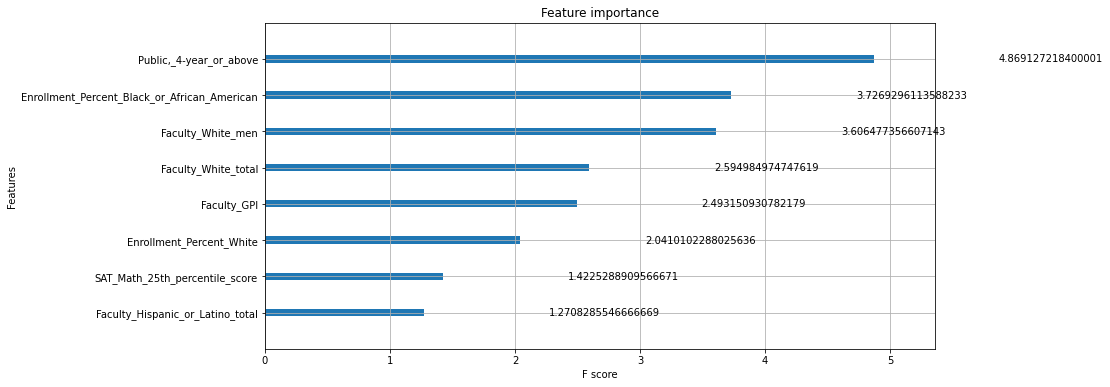

In [77]:
from xgboost import plot_importance
import matplotlib.pyplot as plt
xgb_best_pipeline.get_booster().feature_names = [s.replace(' ', '_') for s in features_all]
fig, ax = plt.subplots(figsize=(12,6))
plot_importance(xgb_best_pipeline.get_booster(), max_num_features=8, ax=ax, importance_type='gain')
plt.show();

### Model Evaluation

In [78]:
model_eval = pd.DataFrame()
model_eval['Model Name'] = model_names
model_eval["Cross Validation MSE"] = [format(i, 'f') for i in cross_val_mse]
model_eval["Validation MSE"] = [format(i, 'f') if i < 1 else format(i, 'e') for i in val_mse]
model_eval["Test MSE"] = test_mse
model_eval["Validation R^2"] = [format(i, 'f') if i > -1 else format(i, 'e') for i in val_r2]
model_eval["Test R^2"] = [format(i, 'f') for i in test_r2]

In [79]:
pd.set_option('display.max_colwidth', None)
model_eval.sort_values('Validation MSE', ascending=True)

,Model Name,Cross Validation MSE,Validation MSE,Test MSE,Validation R^2,Test R^2
10,"Random Forest: 1000 estimators, max_features=sqrt, min_samples_leaf=3",0.045719,0.037631,0.042832,0.347443,0.369749
11,"Random Forest: 1000 estimators, max_features=30",0.045393,0.041224,0.039670,0.285140,0.416266
8,Random Forest: 100 estimators,0.047452,0.041928,0.039503,0.272929,0.418731
2,Linear regression with all features,0.053172,0.041988,0.051398,0.271880,0.243693
9,"Random Forest: 1000 estimators, max_depth=7",0.049606,0.043878,0.041583,0.239106,0.388119
0,Linear regression with four selected features,0.054755,0.044096,0.054503,0.235338,0.198012
12,XGB,0.047251,0.044247,0.043515,0.232715,0.359703
13,"XGB with 100 estimators, learning_rate=0.01, max_depth=3",0.047251,0.044247,0.043515,0.232715,0.359703
6,"Elastic Net with L1 ratio = 0.1, alpha = 0.2",0.058415,0.045682,0.056584,0.207835,0.167392
5,"Elastic Net with L1 ratio = 0.5, alpha = 0.1",0.058388,0.051571,0.062462,0.105699,0.080905


In [80]:
model_eval.sort_values('Validation MSE', ascending=True)[['Model Name', 'Cross Validation MSE', 'Validation MSE', 'Test MSE']].to_latex(index=False)

'\\begin{tabular}{lllr}\n\\toprule\n                                                           Model Name & Cross Validation MSE & Validation MSE &  Test MSE \\\\\n\\midrule\nRandom Forest: 1000 estimators, max\\_features=sqrt, min\\_samples\\_leaf=3 &             0.045719 &       0.037631 &  0.042832 \\\\\n                      Random Forest: 1000 estimators, max\\_features=30 &             0.045393 &       0.041224 &  0.039670 \\\\\n                                        Random Forest: 100 estimators &             0.047452 &       0.041928 &  0.039503 \\\\\n                                  Linear regression with all features &             0.053172 &       0.041988 &  0.051398 \\\\\n                          Random Forest: 1000 estimators, max\\_depth=7 &             0.049606 &       0.043878 &  0.041583 \\\\\n                        Linear regression with four selected features &             0.054755 &       0.044096 &  0.054503 \\\\\n                                               

In [81]:
model_eval.sort_values('Validation R^2', ascending=False)[['Model Name', 'Validation R^2', 'Test R^2']].to_latex(index=False)

'\\begin{tabular}{lll}\n\\toprule\n                                                           Model Name & Validation R\\textasciicircum 2 &  Test R\\textasciicircum 2 \\\\\n\\midrule\nRandom Forest: 1000 estimators, max\\_features=sqrt, min\\_samples\\_leaf=3 &       0.347443 &  0.369749 \\\\\n                      Random Forest: 1000 estimators, max\\_features=30 &       0.285140 &  0.416266 \\\\\n                                        Random Forest: 100 estimators &       0.272929 &  0.418731 \\\\\n                                  Linear regression with all features &       0.271880 &  0.243693 \\\\\n                          Random Forest: 1000 estimators, max\\_depth=7 &       0.239106 &  0.388119 \\\\\n                        Linear regression with four selected features &       0.235338 &  0.198012 \\\\\n                                                                  XGB &       0.232715 &  0.359703 \\\\\n             XGB with 100 estimators, learning\\_rate=0.01, max\\_dept

In [82]:
model_eval.sort_values('Cross Validation MSE', ascending=True)['Model Name'].values

array(['Random Forest: 1000 estimators, max_features=30',
       'Random Forest: 1000 estimators, max_features=sqrt, min_samples_leaf=3',
       'XGB', 'XGB with 100 estimators, learning_rate=0.01, max_depth=3',
       'Random Forest: 100 estimators',
       'Random Forest: 1000 estimators, max_depth=7',
       'Linear regression with all features',
       'Linear regression with four selected features',
       'Elastic Net with L1 ratio = 0.5, alpha = 0.1',
       'Elastic Net with L1 ratio = 0.1, alpha = 0.2',
       'Linear regression with Faculty GPI',
       'Elastic Net with L1 ratio of 0.8',
       'Elastic Net with L1 ratio = 0.8, alpha = 0.5',
       'Decision Tree with max_depth=10'], dtype=object)

### Most Important Features of Best Performing Model

In [83]:
rf_features1000_sqrt.sort_values('Importance', ascending=False)

,Feature Name,Importance
19,Faculty_GPI,9.38
23,Enrollment_Percent_Black_or_African_American,6.66
7,Faculty_White_total,5.49
24,Enrollment_Percent_White,5.19
8,Faculty_White_men,4.81
2,SAT_Math_25th_percentile_score,4.55
22,Enrollment_Percent_Hispanic_or_Latino,4.33
9,Faculty_White_women,4.28
20,Enrollment_Grand_total,3.92
3,SAT_Math_75th_percentile_score,3.91


Text(0.5, 1.0, 'Top 20 Most Important Features in Best Performing Random Forest Model')

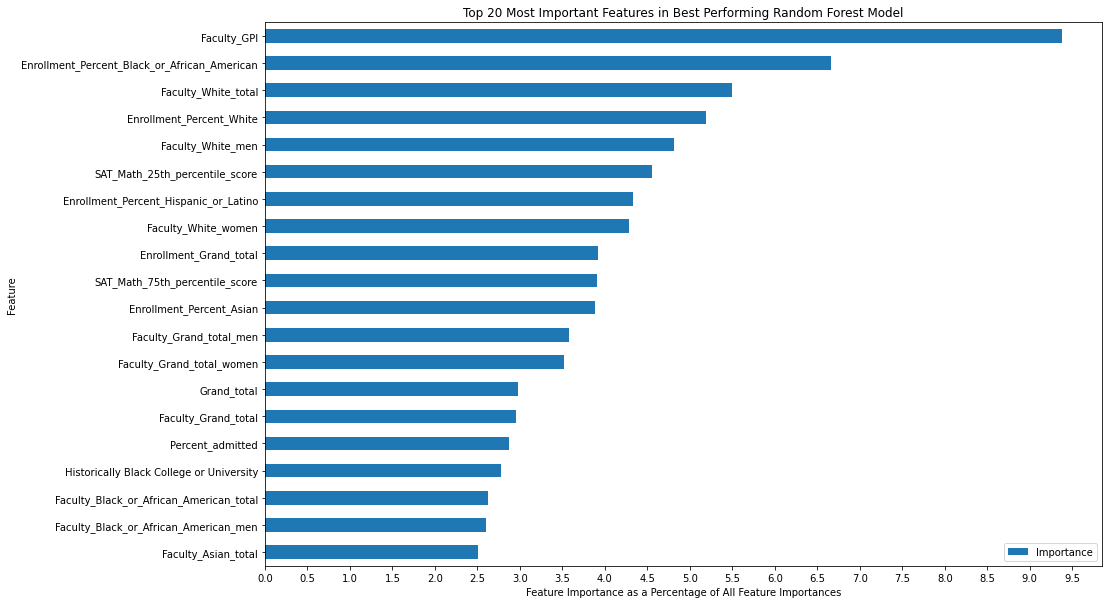

In [84]:
ax = rf_features1000_sqrt.sort_values('Importance').tail(20).plot(kind='barh', figsize=(15, 10))
ax.set_yticklabels(rf_features1000_sqrt.sort_values('Importance').tail(20)['Feature Name'])
ax.set_xticks(np.arange(0, 10, 0.5))
ax.set_ylabel("Feature")
ax.set_xlabel("Feature Importance as a Percentage of All Feature Importances")
ax.set_title("Top 20 Most Important Features in Best Performing Random Forest Model")